In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import GridSearchCV
import statsmodels.api as sm
import tensorflow as tf
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.model_selection import GridSearchCV
from scipy import stats

In [ ]:
input_data = pd.read_csv("/content/drive/MyDrive/IN_Table.csv")
output_data = pd.read_csv("/content/drive/MyDrive/OUT_Table.csv")

In [ ]:
data = pd.concat([input_data,output_data], axis=1)
data

,IN1,IN2,IN3,IN4,IN5,Out1,Out2
0,0.077744,0.795565,-0.665503,0.879321,0.134419,-0.122686,0.123661
1,0.080313,0.824595,-0.655447,0.875636,0.134941,-0.122686,0.123661
2,0.087355,0.776258,-0.650550,0.884105,0.132452,-0.026857,0.123661
3,0.091774,0.739149,-0.644934,0.892043,0.131287,-0.026857,0.251010
4,0.091166,0.761332,-0.648654,0.892752,0.136788,-0.026857,0.251010
...,...,...,...,...,...,...,...
14396,-2.371841,-1.399878,-2.594168,-0.861832,-1.607387,-2.039274,-1.531870
14397,-2.378745,-1.407683,-2.601522,-0.871577,-1.604817,-2.039274,-1.531870
14398,-2.385070,-1.388787,-2.606594,-0.880330,-1.579605,-1.943445,-1.659219
14399,-2.386119,-1.372492,-2.615738,-0.886744,-1.556761,-1.943445,-1.659219


In [ ]:
data.columns = data.columns.str.strip()

In [ ]:
data1 = data.drop(['Out2'],axis=1)
data1

,IN1,IN2,IN3,IN4,IN5,Out1
0,0.077744,0.795565,-0.665503,0.879321,0.134419,-0.122686
1,0.080313,0.824595,-0.655447,0.875636,0.134941,-0.122686
2,0.087355,0.776258,-0.650550,0.884105,0.132452,-0.026857
3,0.091774,0.739149,-0.644934,0.892043,0.131287,-0.026857
4,0.091166,0.761332,-0.648654,0.892752,0.136788,-0.026857
...,...,...,...,...,...,...
14396,-2.371841,-1.399878,-2.594168,-0.861832,-1.607387,-2.039274
14397,-2.378745,-1.407683,-2.601522,-0.871577,-1.604817,-2.039274
14398,-2.385070,-1.388787,-2.606594,-0.880330,-1.579605,-1.943445
14399,-2.386119,-1.372492,-2.615738,-0.886744,-1.556761,-1.943445


In [ ]:
data2 = data.drop(['Out1'],axis=1)
data2

,IN1,IN2,IN3,IN4,IN5,Out2
0,0.077744,0.795565,-0.665503,0.879321,0.134419,0.123661
1,0.080313,0.824595,-0.655447,0.875636,0.134941,0.123661
2,0.087355,0.776258,-0.650550,0.884105,0.132452,0.123661
3,0.091774,0.739149,-0.644934,0.892043,0.131287,0.251010
4,0.091166,0.761332,-0.648654,0.892752,0.136788,0.251010
...,...,...,...,...,...,...
14396,-2.371841,-1.399878,-2.594168,-0.861832,-1.607387,-1.531870
14397,-2.378745,-1.407683,-2.601522,-0.871577,-1.604817,-1.531870
14398,-2.385070,-1.388787,-2.606594,-0.880330,-1.579605,-1.659219
14399,-2.386119,-1.372492,-2.615738,-0.886744,-1.556761,-1.659219


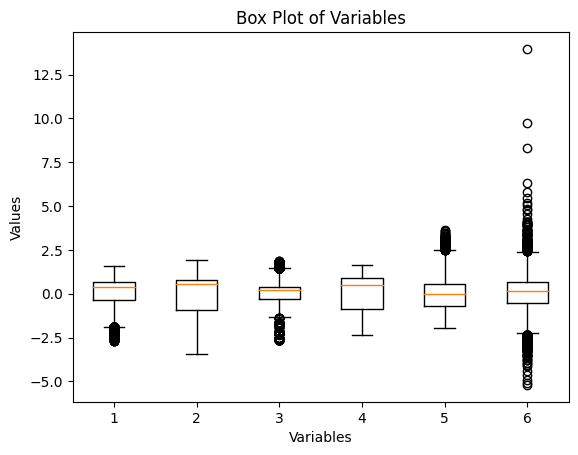

In [ ]:
plt.boxplot(data1[['IN1', 'IN2', 'IN3','IN4', 'IN5','Out1']])
plt.xlabel('Variables')
plt.ylabel('Values')
plt.title('Box Plot of Variables')
plt.show()

In [ ]:
outlier_counts = {}

for column in data1.columns:
    q1 = data1[column].quantile(0.25)
    q3 = data1[column].quantile(0.75)
    iqr = q3 - q1
    outliers = data1[column][(data[column] < q1 - 1.5 * iqr) | (data1[column] > q3 + 1.5 * iqr)]
    outlier_counts[column] = len(outliers)

print("Outlier counts:", outlier_counts)

Outlier counts: {'IN1': 1415, 'IN2': 0, 'IN3': 2420, 'IN4': 0, 'IN5': 248, 'Out1': 410}


In [ ]:
data1.describe().T

,count,mean,std,min,25%,50%,75%,max
IN1,14401.0,-2.368311e-14,1.0,-2.696646,-0.338584,0.361759,0.684244,1.590639
IN2,14401.0,-6.012353e-14,1.0,-3.437986,-0.937182,0.570995,0.761058,1.939639
IN3,14401.0,-7.420709e-15,1.0,-2.639204,-0.301319,0.224860,0.401143,1.844610
IN4,14401.0,-2.090429e-14,1.0,-2.354538,-0.879161,0.503408,0.886232,1.654608
IN5,14401.0,-6.631272e-16,1.0,-1.934470,-0.713098,-0.041588,0.572189,3.615581
Out1,14401.0,-1.499299e-13,1.0,-5.201644,-0.506004,0.164802,0.643949,13.964233


In [ ]:
columns_to_scale = ['IN1', 'IN2', 'IN3', 'IN4', 'IN5', 'Out1']
scaler = MinMaxScaler(feature_range=(-1.5,1.5))
data1[columns_to_scale] = scaler.fit_transform(data1[columns_to_scale])
data1[columns_to_scale] += (0.25 - data1[columns_to_scale].quantile(0.75))

In [ ]:
data1.describe().T

,count,mean,std,min,25%,50%,75%,max
IN1,14401.0,-0.228795,0.699744,-2.115756,-0.465718,0.024343,0.25,0.884244
IN2,14401.0,-0.174569,0.557867,-2.092509,-0.697393,0.143970,0.25,0.907491
IN3,14401.0,-0.018394,0.669073,-1.784215,-0.219999,0.132054,0.25,1.215785
IN4,14401.0,-0.413157,0.748289,-2.175032,-1.071024,-0.036463,0.25,0.824968
IN5,14401.0,-0.059288,0.540536,-1.104938,-0.444743,-0.081768,0.25,1.895062
Out1,14401.0,0.149204,0.156528,-0.665000,0.070000,0.175000,0.25,2.335000


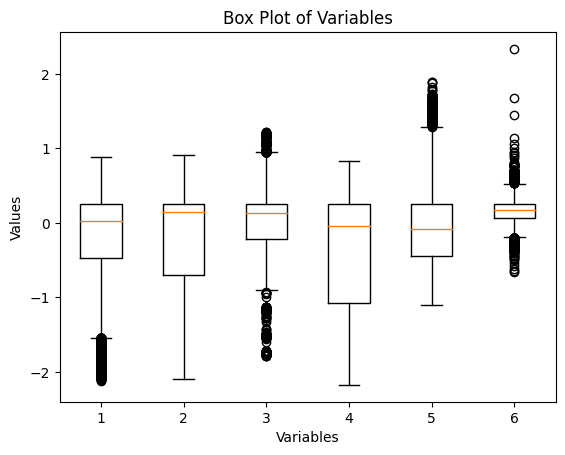

In [ ]:
plt.boxplot(data1[['IN1', 'IN2', 'IN3','IN4', 'IN5','Out1']])
plt.xlabel('Variables')
plt.ylabel('Values')
plt.title('Box Plot of Variables')
plt.show()

In [ ]:
data1.shape

(14401, 6)

In [ ]:
data1.isnull().sum()

IN1     0
IN2     0
IN3     0
IN4     0
IN5     0
Out1    0
dtype: int64

# **LSTM**
# Model for H2S

In [ ]:
inputs = data1.drop(['Out1'],axis=1)
target = data1[['Out1']]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(inputs,target, test_size=0.3, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train_reshaped = X_train_scaled.reshape(-1, 1, inputs.shape[1])
X_test_reshaped = X_test_scaled.reshape(-1, 1, inputs.shape[1])

Epoch 1/300
315/315 [==============================] - 16s 25ms/step - loss: 0.0151 - val_loss: 0.0133
Epoch 2/300
315/315 [==============================] - 7s 22ms/step - loss: 0.0140 - val_loss: 0.0130
Epoch 3/300
315/315 [==============================] - 6s 19ms/step - loss: 0.0137 - val_loss: 0.0135
Epoch 4/300
315/315 [==============================] - 8s 24ms/step - loss: 0.0136 - val_loss: 0.0133
Epoch 5/300
315/315 [==============================] - 6s 19ms/step - loss: 0.0135 - val_loss: 0.0129
Epoch 6/300
315/315 [==============================] - 9s 29ms/step - loss: 0.0132 - val_loss: 0.0125
Epoch 7/300
315/315 [==============================] - 7s 21ms/step - loss: 0.0131 - val_loss: 0.0121
Epoch 8/300
315/315 [==============================] - 8s 25ms/step - loss: 0.0129 - val_loss: 0.0122
Epoch 9/300
315/315 [==============================] - 6s 19ms/step - loss: 0.0127 - val_loss: 0.0117
Epoch 10/300
315/315 [==============================] - 8s 24ms/step - loss: 0.01

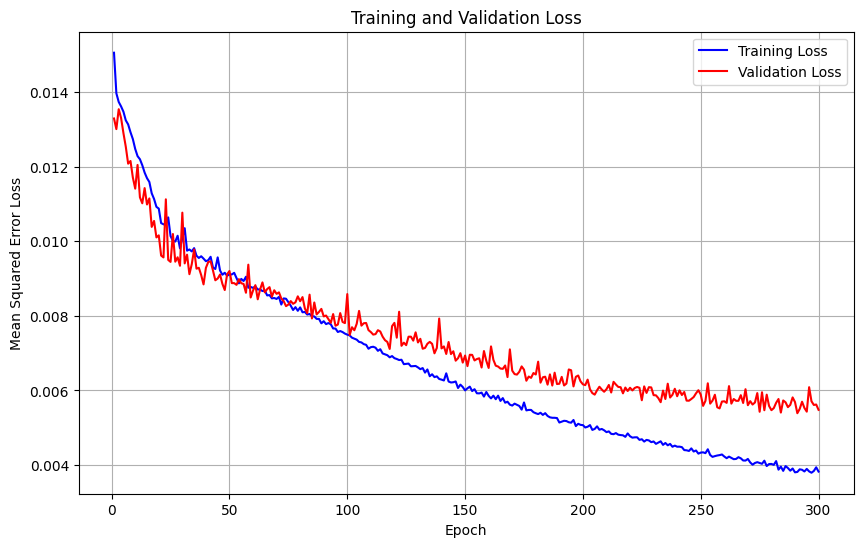

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras import backend as K

def swish(x):
    return x * K.sigmoid(x)

model = Sequential()
model.add(LSTM(256, input_shape=(1, inputs.shape[1]), return_sequences=True))
model.add(LSTM(128, return_sequences=True))
model.add(LSTM(64))
model.add(Dense(200, activation=swish))
model.add(Dense(target.shape[1]))

model.compile(loss='mean_squared_error', optimizer='nadam')
train_losses = []
val_losses = []

class LossHistory(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        train_losses.append(logs.get('loss'))
        val_losses.append(logs.get('val_loss'))


loss_history = LossHistory()

history = model.fit(X_train_reshaped, y_train, epochs=300, batch_size=32,
                    validation_data=(X_test_reshaped, y_test), callbacks=[loss_history])


epochs = np.arange(1, 301)

plt.figure(figsize=(10, 6))
plt.plot(epochs, train_losses, label='Training Loss', color='blue')
plt.plot(epochs, val_losses, label='Validation Loss', color='red')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid()
plt.show()

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 256)            268288    
                                                                 
 lstm_1 (LSTM)               (None, 1, 128)            197120    
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 200)               13000     
                                                                 
 dense_1 (Dense)             (None, 1)                 201       
                                                                 
Total params: 528,017
Trainable params: 528,017
Non-trainable params: 0
_________________________________________________________________


In [ ]:
y_pred = model.predict(X_test_reshaped)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

136/136 [==============================] - 3s 7ms/step
Mean Squared Error: 0.005480850572439056


In [ ]:
r2 = r2_score(y_test, y_pred)
print(f"R-squared Score: {r2}")

R-squared Score: 0.7761608443895313


In [ ]:
nmrse = np.sqrt(mse) / np.mean(y_test)
print(f"NMRSE: {nmrse}")

NMRSE: Out1    0.49286
dtype: float64


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [ ]:
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

Mean Absolute Error: 0.05262391007462456


In [ ]:
accuracy = 1 - mse
print("Accuracy:", accuracy)

Accuracy: 0.9945191494275609


In [ ]:
y_test_reshaped = np.array(y_test).reshape(-1, target.shape[1])
y_pred_reshaped = y_pred.reshape(-1, target.shape[1])

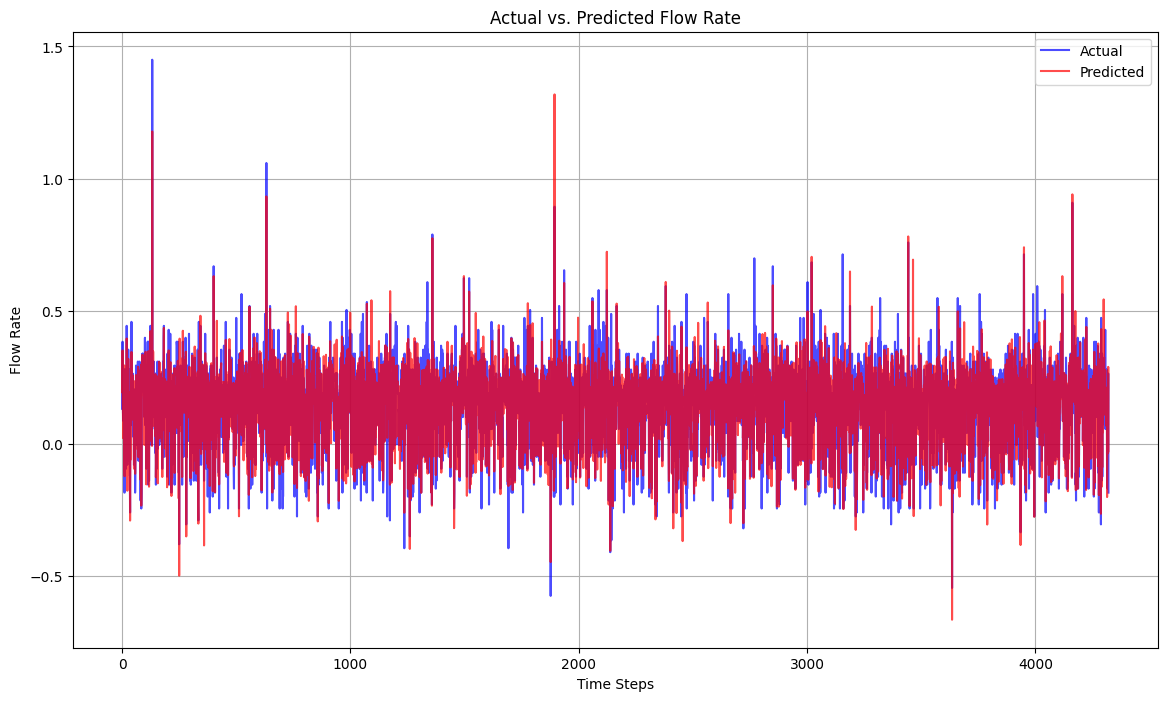

In [ ]:
import matplotlib.pyplot as plt
time_steps = np.arange(len(y_test_reshaped))
plt.figure(figsize=(14, 8))
plt.plot(time_steps, y_test_reshaped, label='Actual', color='blue', alpha=0.7)
plt.plot(time_steps, y_pred_reshaped, label='Predicted', color='red', alpha=0.7)
plt.xlabel('Time Steps')
plt.ylabel('Flow Rate')
plt.title('Actual vs. Predicted Flow Rate')
plt.legend()
plt.grid()
plt.show()

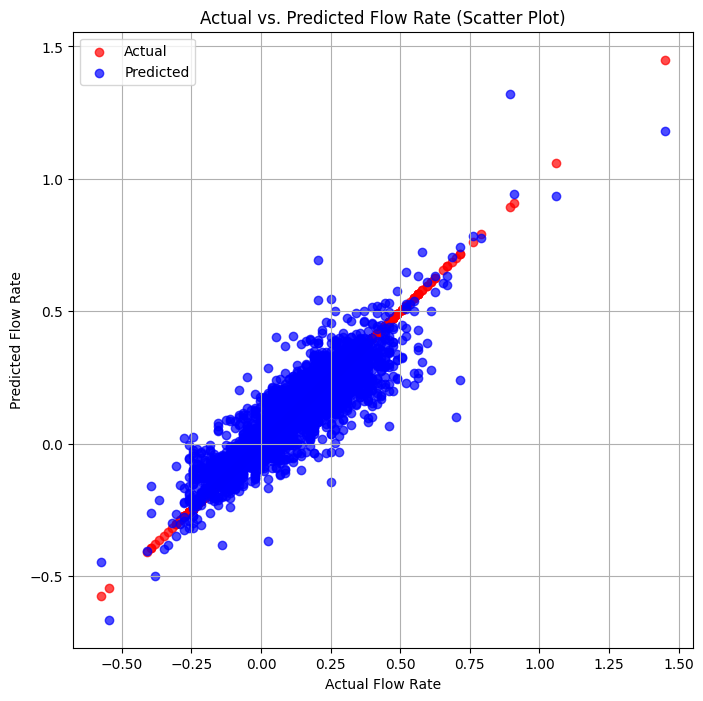

In [ ]:
plt.figure(figsize=(8, 8))
plt.scatter(y_test_reshaped, y_test_reshaped, color='red', alpha=0.7, label='Actual')
plt.scatter(y_test_reshaped, y_pred_reshaped, color='blue', alpha=0.7, label='Predicted')
plt.xlabel('Actual Flow Rate')
plt.ylabel('Predicted Flow Rate')
plt.title('Actual vs. Predicted Flow Rate (Scatter Plot)')
plt.grid(True)
plt.legend()
plt.show()

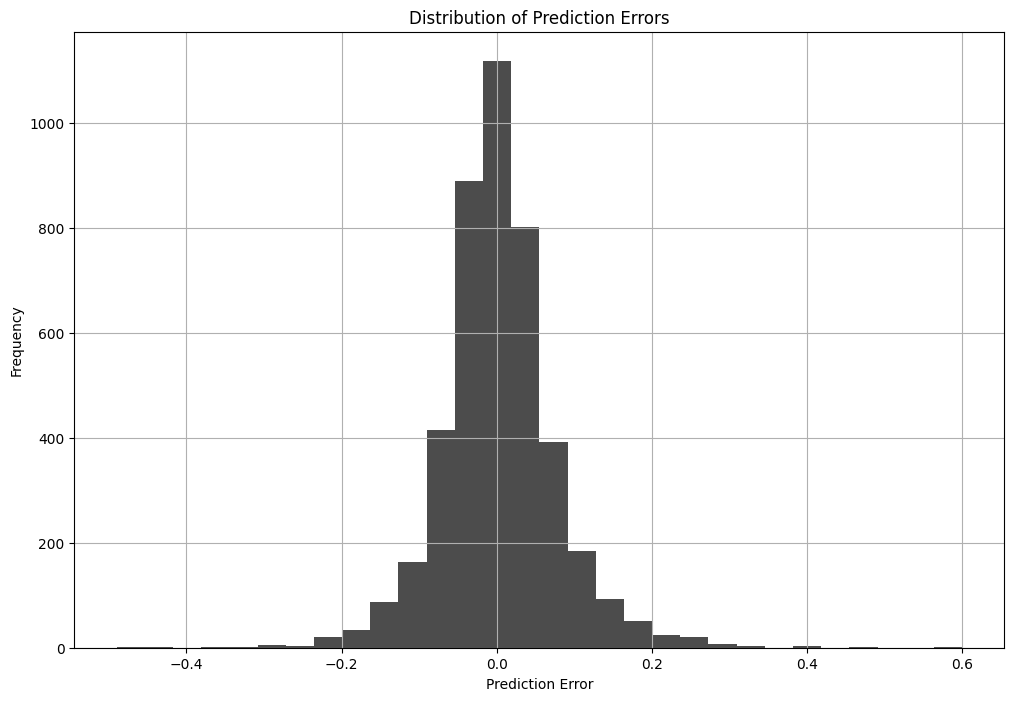

In [ ]:
errors = y_test_reshaped - y_pred_reshaped
plt.figure(figsize=(12, 8))
plt.hist(errors, bins=30, color='black', alpha=0.7)
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.title('Distribution of Prediction Errors')
plt.grid()
plt.show()

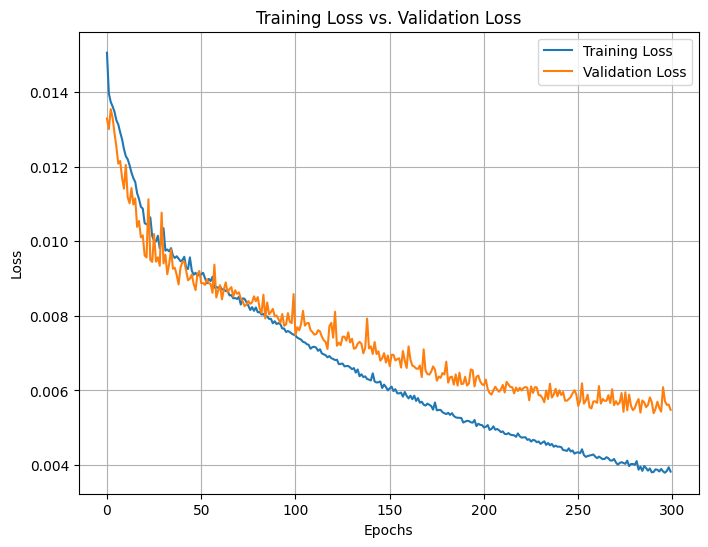

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 256)            268288    
                                                                 
 lstm_1 (LSTM)               (None, 1, 128)            197120    
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 200)               13000     
                                                                 
 dense_1 (Dense)             (None, 1)                 201       
                                                                 
Total params: 528,017
Trainable params: 528,017
Non-trainable params: 0
_________________________________________________________________
136/136 [==============================] - 1s 5ms/

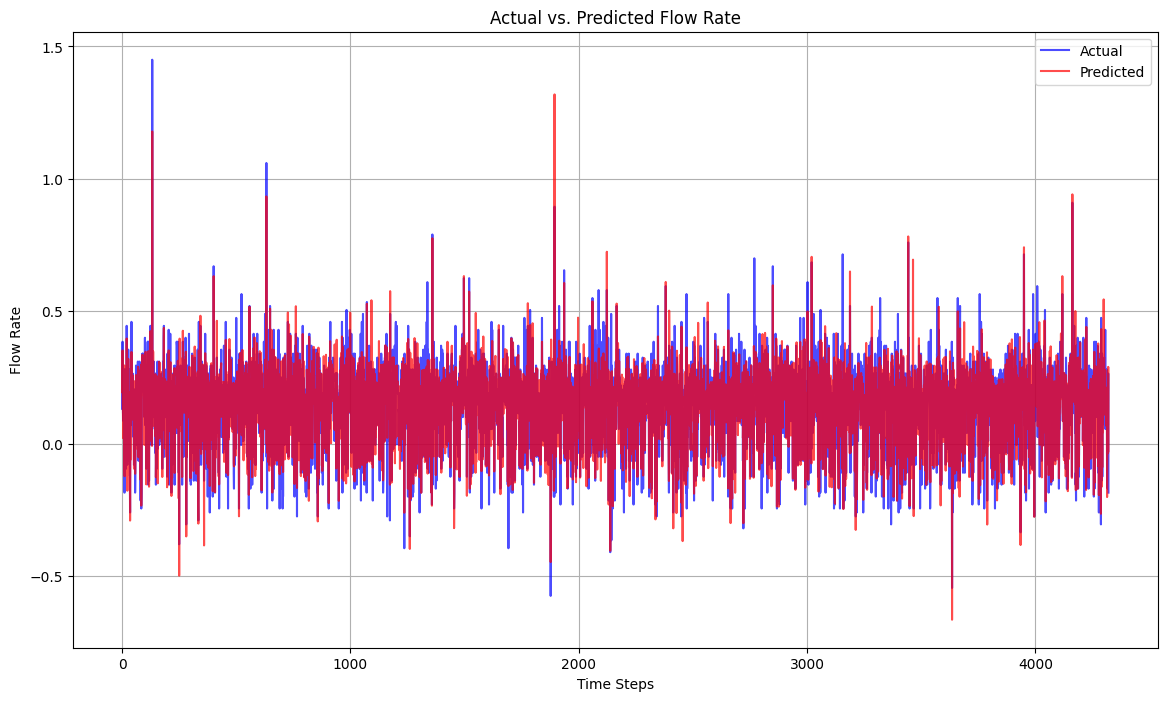

In [ ]:
# Consolidate the results
# 1. Training Loss vs. Validation Loss Plot
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss vs. Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

# 2. Print and Save Model Summary
model.summary()

# 3. Evaluate the model with metrics (e.g., MSE, RMSE)
loss = model.evaluate(X_test_reshaped, y_test)
print("Mean Squared Error (MSE):", loss)

# 4. Time Series Plot of Actual vs. Predicted Values
time_steps = np.arange(len(y_test_reshaped))
plt.figure(figsize=(14, 8))
plt.plot(time_steps, y_test_reshaped, label='Actual', color='blue', alpha=0.7)
plt.plot(time_steps, y_pred_reshaped, label='Predicted', color='red', alpha=0.7)
plt.xlabel('Time Steps')
plt.ylabel('Flow Rate')
plt.title('Actual vs. Predicted Flow Rate')
plt.legend()
plt.grid()
plt.show()

In [ ]:
model.save('/content/drive/MyDrive/Model_GUI1/H2S_Model_GUI.h5')